In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from scipy.fft import fft, ifft
import pyspedas
from pytplot import tplot
from pytplot import tplot, get_data, store_data, tlimit, options,tplot_names

from datetime import datetime, timedelta



save_fig = 'no'
# save_csv = 'no'

save_images = 'no'
save_csv = 'yes'


mag_arr_str = 'MMS2_B.csv'


In [ ]:
#jet_candidate_timeranges = np.array([['2020-06-17/21:11:25','2020-06-17/21:11:49']]) #1 

#jet_candidate_timeranges = np.array([['2020-06-17/21:16:25','2020-06-17/21:16:43']]) #2 # got it pretty good I think
jet_candidate_timeranges = np.array([['2020-06-17/21:16:50','2020-06-17/21:17:10']]) #3 # got it pretty good I think
#jet_candidate_timeranges = np.array([['2020-06-17/21:24:34','2020-06-17/21:25:22.00']]) #4 # good looking event
#jet_candidate_timeranges = np.array([['2020-06-17/21:29:08.000','2020-06-17/21:29:20']]) #5# good looking event
#jet_candidate_timeranges = np.array([['2020-06-17/21:40:49','2020-06-17/21:41:23']]) #6 okay looking
#jet_candidate_timeranges =np.array([['2020-06-17/22:43:33.00','2020-06-17/22:44:05.00']]) #9 ehh
#jet_candidate_timeranges=np.array([['2020-06-17/22:46:24.000','2020-06-17/22:46:41.000']])#10 okay looking

#jet_candidate_timeranges = np.array([['2020-06-17/23:03:49.000','2020-06-17/23:03:59.000']]) #11 pretty good

#jet_candidate_timeranges = np.array([['2020-06-17/23:08:35.500','2020-06-17/23:08:59.000']])#12


# # # sugggestion to move the jet candidate event end from 2020-06-17/23:11:22.000 to 23:10:52
#jet_candidate_timeranges =np.array([['2020-06-17/23:10:42.000','2020-06-17/23:10:53.000']]) #13 okay, hard to see peak Vl
#jet_candidate_timeranges =np.array([['2020-06-17/23:17:16','2020-06-17/23:17:29.000']]) #14  pretty good
#jet_candidate_timeranges = np.array([['2020-06-17/23:34:54','2020-06-17/23:35:18']]) # 15 good
#jet_candidate_timeranges =np.array([['2020-06-17/23:36:56.000','2020-06-17/23:37:27.000']]) #16 good; well-defined peak
#jet_candidate_timeranges =np.array([['2020-06-17/23:42:45.000','2020-06-17/23:43:02.000']]) #17 VERY GOOD
#jet_candidate_timeranges = np.array([['2020-06-17/23:49:23.000','2020-06-17/23:49:49.000']]) #18 good; well-defined peak
#jet_candidate_timeranges =np.array([['2020-06-17/23:57:55','2020-06-17/23:58:27']]) #19 good
#jet_candidate_timeranges = np.array([['2020-06-18/00:22:08.000','2020-06-18/00:22:36']]) #22
# jet_candidate_timeranges[0,1]



#times_temp = np.array([['2020-06-17/21:11:26.000','2020-06-17/21:11:48.000']])#1 
#times_temp = np.array([['2020-06-17/21:16:34.799','2020-06-17/21:16:40.799']]) #2
times_temp =np.array([['2020-06-17/21:16:55.000','2020-06-17/21:17:07.000']]) #3 
#times_temp =np.array([['2020-06-17/21:24:36.000','2020-06-17/21:25:20.000']]) #4 include
#times_temp =np.array([['2020-06-17/21:29:09.200','2020-06-17/21:29:19.150']])#5 
#times_temp =np.array([['2020-06-17/21:40:51.400','2020-06-17/21:41:20.799']]) #6 include
#times_temp =np.array([['2020-06-17/22:15:34.000','2020-06-17/22:16:42.000']]) #7
#times_temp = np.array([['2020-06-17/22:18:18.200','2020-06-17/22:18:31.000']]) #8
#times_temp =np.array([['2020-06-17/22:43:34','2020-06-17/22:44:03.599']]) #9
#times_temp =np.array([['2020-06-17/22:46:25.250','2020-06-17/22:46:38.500']])#10
#times_temp =np.array([['2020-06-17/23:03:50.000','2020-06-17/23:03:58.000']]) #11
#times_temp =np.array([['2020-06-17/23:08:35.700','2020-06-17/23:08:57.400']])#12
#times_temp = np.array([['2020-06-17/23:10:43.000','2020-06-17/23:10:52.00']]) #13
#times_temp =np.array([['2020-06-17/23:17:17.299','2020-06-17/23:17:28.000']]) #14
#times_temp =np.array([['2020-06-17/23:34:55.400','2020-06-17/23:35:17.500']]) #15
#times_temp =np.array([['2020-06-17/23:36:57.600','2020-06-17/23:37:26.500']]) #16
#times_temp =np.array([['2020-06-17/23:42:47.000','2020-06-17/23:42:59.000']]) #17
#times_temp =np.array([['2020-06-17/23:49:26.400','2020-06-17/23:49:46.350']]) #18
#times_temp =np.array([['2020-06-17/23:57:57.599','2020-06-17/23:58:25.000']]) #19
#times_temp =np.array([['2020-06-18/00:04:58.599','2020-06-18/00:05:11.099']]) #20
#times_temp =np.array([['2020-06-18/00:09:41.000','2020-06-18/00:10:05.000']]) #21
# # #suggestion to move start time from 00:22:14.000 to 00:22:09.000
#times_temp =np.array([['2020-06-18/00:22:09.000','2020-06-18/00:22:35.599']]) #22


In [2]:
fsm_data =pyspedas.mms.mms_load_fsm(trange=['2020-06-17/21:00:00', '2020-06-17/22:00:00'], probe='1', 
                          data_rate='brst', level='l3', datatype='8khz',time_clip=True)

fgm_data =pyspedas.mms.mms_load_fgm(trange=['2020-06-17/21:00:00', '2020-06-17/22:00:00'], probe='1', 
                          data_rate='brst', level='l2',time_clip=True)

scm_data =pyspedas.mms.mms_load_fgm(trange=['2020-06-17/21:00:00', '2020-06-17/22:00:00'], probe='1', 
                          data_rate='brst', level='l2',time_clip=True)



02-Oct-24 13:06:03: Loading pydata/mms1/fsm/brst/l3/8khz/2020/06/17/mms1_fsm_brst_l3_8khz_20200617205913_v1.1.0.cdf
02-Oct-24 13:06:03: Loading pydata/mms1/fsm/brst/l3/8khz/2020/06/17/mms1_fsm_brst_l3_8khz_20200617210143_v1.1.0.cdf
02-Oct-24 13:06:03: Loading pydata/mms1/fsm/brst/l3/8khz/2020/06/17/mms1_fsm_brst_l3_8khz_20200617210413_v1.1.0.cdf
02-Oct-24 13:06:03: Loading pydata/mms1/fsm/brst/l3/8khz/2020/06/17/mms1_fsm_brst_l3_8khz_20200617210643_v1.1.0.cdf
02-Oct-24 13:06:03: Loading pydata/mms1/fsm/brst/l3/8khz/2020/06/17/mms1_fsm_brst_l3_8khz_20200617210913_v1.1.0.cdf
02-Oct-24 13:06:03: Loading pydata/mms1/fsm/brst/l3/8khz/2020/06/17/mms1_fsm_brst_l3_8khz_20200617211133_v1.1.0.cdf
02-Oct-24 13:06:03: Loading pydata/mms1/fsm/brst/l3/8khz/2020/06/17/mms1_fsm_brst_l3_8khz_20200617211403_v1.1.0.cdf
02-Oct-24 13:06:03: Loading pydata/mms1/fsm/brst/l3/8khz/2020/06/17/mms1_fsm_brst_l3_8khz_20200617211633_v1.1.0.cdf
02-Oct-24 13:06:03: Loading pydata/mms1/fsm/brst/l3/8khz/2020/06/17/mms1

In [9]:
fsm_MMS1= 'mms1_fsm_b_gse_brst_l3'
times_fsm, data_fsm = get_data(fsm_MMS1)

fsm_MMS1_bmag= 'mms1_fsm_b_mag_brst_l3'
times_fsm_mag, data_fsm_mag = get_data(fsm_MMS1_bmag)


# MMS1  FSM data for time period
MMS1_fsm_GSE = pd.DataFrame({"times": times_fsm, "Bx": data_fsm[:,0],
                       "By": data_fsm[:,1], "Bz": data_fsm[:,2],"Bmag": data_fsm_mag})
MMS1_fsm_GSE['date'] = pd.to_datetime(MMS1_fsm_GSE['times'],unit='s')

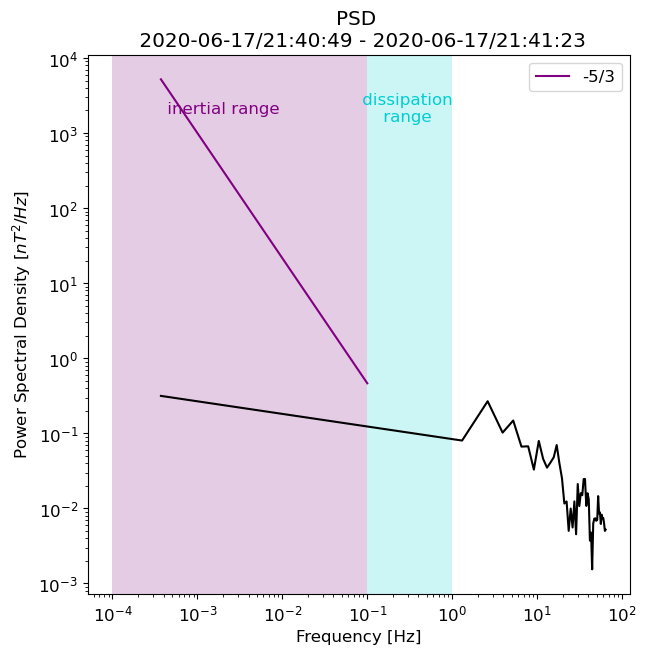

H_plus_gyrofrequency [0.16414030666351317]


In [12]:
#def create_PSD_during_KHI(mag_arr, timerange):
mag_arr = MMS1_fsm_GSE

Fs_B = 128 # MMS Fluxgate Magnetometer (FGM) instruments have a sampling frequency of 128 Hz in burst mode


energy_rangeB=[]
inertial_rangeB=[]
dissipation_rangeB=[]
electron_dissipationB=[]
P1_Bmag = []
fB =[]

H_plus_gyrofrequency = []
for t in range(len(jet_candidate_timeranges)):
    t1 = pd.to_datetime(jet_candidate_timeranges[t,0]) -timedelta(seconds = 4)
    t2 = pd.to_datetime(jet_candidate_timeranges[t,1])+ timedelta(seconds = 4)


    st_t = mag_arr.date.searchsorted(t1)
    end_t = mag_arr.date.searchsorted(t2)
   

    LB = len(np.array(mag_arr['Bmag'][st_t:end_t])) # length of signal

# compute the fft of B-field magnitude during a a specified start and stop time around a CS and Magnetic Rx
# interval then subtract by the mean of that same interval
   
    Bfft_mag_per_interval = fft(np.array(mag_arr['Bmag'][st_t:end_t])) - np.mean(np.array(mag_arr['Bmag'][st_t:end_t]))
   #not sure if i need this
    H_plus_gyrofrequency.append(0.0153*np.mean(mag_arr['Bmag'][st_t:end_t]))
 
    #compute the two-sided spectrum P2. 
    
    P2_Bmag_per_interval = np.abs(Bfft_mag_per_interval/LB)
    # % compute the single-sided spectrum P1 based on P2 and the even-valued
    # % signal length, L 
    
    P1_Bmag_per_interval = P2_Bmag_per_interval[1:int(np.round(LB/2)+1)]
    P1_Bmag_per_interval[2:len(P1_Bmag_per_interval)-1] = 2*P1_Bmag_per_interval[2:len(P1_Bmag_per_interval)-1]
    #f_Bper_interval = Fs_B/LB* np.linspace(1,int(0.5*LB-1),int(0.5*LB-1))# frequency domain f
    f_Bper_interval = Fs_B/LB* np.linspace(1,int(0.5*LB-1))# frequency domain f

    P1_Bmag.append(P1_Bmag_per_interval[1:len(P1_Bmag_per_interval)-2])
    fB.append(f_Bper_interval)




        
    energy_containing_range_per_i_B = np.argwhere(f_Bper_interval < 0.0001)
    
    inertial_range_per_i_B = np.argwhere((0.0001 <= f_Bper_interval) & (f_Bper_interval <= 0.1))

    dissipation_range_per_i_B = np.argwhere( (0.1 <= f_Bper_interval) &(f_Bper_interval <= 1))
    electron_dissipation_per_i_B =  np.argwhere( f_Bper_interval > 1)

    energy_rangeB.append(energy_containing_range_per_i_B)
    inertial_rangeB.append(inertial_range_per_i_B)
    dissipation_rangeB.append(dissipation_range_per_i_B)
    electron_dissipationB.append(electron_dissipation_per_i_B)
    #y_inertial = np.linspace(0.0001,0.1)
    #y_inertial_1 = np.linspace(1e-2,1e-1)
    y_inertial = np.linspace(f_Bper_interval[0],0.1)
    y_inertial_1 = np.linspace(f_Bper_interval[0],1e-1)

    

    fig = plt.figure(figsize=(7,7))
    plt.rcParams.update({'font.size': 12})
    
    FFT_B_ax = fig.add_subplot(111)
    FFT_B_ax.plot(f_Bper_interval, P1_Bmag_per_interval[0:len(f_Bper_interval)],color='k')
    FFT_B_ax.set_xscale('log')
    FFT_B_ax.set_yscale('log')
    FFT_B_ax.set_ylabel('Power Spectral Density $[nT^2/Hz]$')
    FFT_B_ax.set_xlabel('Frequency [Hz]')
    FFT_B_ax.set_title('PSD \n '+str(jet_candidate_timeranges[t,0])+' - '+str(jet_candidate_timeranges[t,1]))
   
    FFT_B_ax.text(2e-3, .9, ' inertial range ', color='purple', ha='center', va='center', rotation=0,
                 transform = FFT_B_ax.get_xaxis_transform())   

    FFT_B_ax.text(0.3, .9, ' dissipation \n range ', color='darkturquoise', ha='center', va='center', rotation=0,
             transform = FFT_B_ax.get_xaxis_transform())   
    FFT_B_ax.axvspan(0.0001, 0.1, facecolor='purple',alpha=0.2) # inertial range
    FFT_B_ax.axvspan(0.1, 1, facecolor='darkturquoise',alpha=0.2) # dissipation range

    if len(inertial_rangeB) > 0:
       # FFT_B_ax.plot(y_inertial,.001*(y_inertial_1**(-5/3)),color='darkturquoise',label='-5/3') 
        FFT_B_ax.plot(y_inertial,(0.01*y_inertial_1**(-5/3)),color='purple',label='-5/3') 
        FFT_B_ax.legend()
    if len(inertial_rangeB) == 0:
        print('There was an error plotting the inertial range')

    string1 = np.array2string(np.array(t1))
    string2 = np.array2string(np.array(t2))
    
    #print(string)
    time_period_string1 = string1.replace(":", "_")
    time_period_string1 = time_period_string1.replace("/", "_")
    time_period_string1 = time_period_string1.replace("T", "_")
    time_period_string1 = time_period_string1.replace("'", "_")
    #print( time_period_string)
    # time string has .000 or .000000000 remove them for saving
    if len(time_period_string1) > 19:
        time_period_string1 = time_period_string1[0:20]
        #print(string)
    
    time_period_string2 = string2.replace(":", "_")
    time_period_string2 = time_period_string2.replace("/", "_")
    time_period_string2 = time_period_string2.replace("T", "_")
    time_period_string2 = time_period_string2.replace("'", "_")
    if len(time_period_string2) > 19:
        time_period_string2 = time_period_string2[0:20]
        #print(string)
    time_period_string = time_period_string1+time_period_string2
    
    #fig.savefig('PSD_' + time_period_string)

    
#     %% Find Spectral Indices
#     % This is based off of DOI 10.1007/s11214-010-9692-5, section 2, 
#     % "that is, large scale eddies couple to small scale eddies and 
#     % transfer energy to them, giving rise to a typical power-law 
#     % turbulence spectrum, E_k proportional to k^alpha , in the region 
#     % of energy transfer. Here, Ek is the power spectral density at 
#     % wavenumber k, and alpha is the spectral index
    
    
#     ft = fittype( 'power1' )
#     fitopts = fitoptions( 'Method', 'NonlinearLeastSquares' )
#     fitopts.Display = 'Off'
#     partial_P1_mag_per_interval_B = P1_Bmag_per_interval(1:end-2)
#   %uncomment if you want to incude other ranges
#   %fprintf('fitting PSD for energy containing range\n')
# %   if numel(energy_containing_range_per_i) > 1 
# %         [xData_energy_containing, yData_energy_containing] = prepareCurveData( f_per_interval(energy_containing_range_per_i), x(energy_containing_range_per_i) )
# %         [fitresult_energy_containing, gof_energy_containing] = fit( xData_energy_containing, yData_energy_containing, ft, fitopts )
# %         As_energy_containing = [As_energy_containing fitresult_energy_containing.a]
# %         Bs_energy_containing = [Bs_energy_containing fitresult_energy_containing.b]
# %         adjrsquares_energy_containing =[adjrsquares_energy_containing gof_energy_containing.adjrsquare]
# %         rmses_energy_containing = [rmses_energy_containing gof_energy_containing.rmse]
# %     elseif numel(energy_containing_range_per_i) < 1
# %         fprintf('(energy_containing_range) < 1\n')
# %    
    
    
#     if numel(inertial_range_per_i_B) > 1
        
#         if size(f_Bper_interval(inertial_range_per_i_B),2) > 1 % if it's a row vector, change it to a column vector
#             formatted_f_B = f_Bper_interval(inertial_range_per_i_B)'
#         else
#             formatted_f_B = f_Bper_interval(inertial_range_per_i_B)
#         end
        
#         if size(partial_P1_mag_per_interval_B(inertial_range_per_i_B),2) > 1 % if it's a row vector, change it to a column vector
#             formatted_partial_P1_mag_per_interval_B = partial_P1_mag_per_interval_B(inertial_range_per_i_B)'
#         else
#             formatted_partial_P1_mag_per_interval_B = partial_P1_mag_per_interval_B(inertial_range_per_i_B)
#         end
        
#         [xData_inertialB, yData_inertialB] = prepareCurveData(formatted_f_B, formatted_partial_P1_mag_per_interval_B)
#         [fitresult_inertialB, gof_inertialB] = fit(xData_inertialB, yData_inertialB, ft, fitopts )
#         As_inertial_B = [As_inertial_B fitresult_inertialB.a]
#         Bs_inertial_B = [Bs_inertial_B fitresult_inertialB.b]
#         adjrsquares_inertial_B =[adjrsquares_inertial_B gof_inertialB.adjrsquare]
#         rmses_inertial_B = [rmses_inertial_B gof_inertialB.rmse]
#         fprintf( 'B-field spectral index for inertial range from %s - %s: %d \n',...
#             datestr(SW_times(uuu),formatOut_for_plots),datestr(SW_times(uuu+1),formatOut_for_plots),...
#             fitresult_inertialB.b)

#     elseif numel(inertial_range_per_i_B) < 1
#         fprintf('numel(inertial_range) < 1')
#     end




#     ft = fittype( 'power1' )
#     fitopts = fitoptions( 'Method', 'NonlinearLeastSquares' )
#     fitopts.Display = 'Off'
#     partial_P1_mag_per_interval_V = P1_Vmag_per_interval(1:end-2)
 
#     if numel(inertial_range_per_i_V) > 1
        
#         if size(f_Vper_interval(inertial_range_per_i_V),2) > 1 % if it's a row vector, change it to a column vector
#             formatted_f_V = f_Vper_interval(inertial_range_per_i_V)'
#         else
#             formatted_f_V = f_Vper_interval(inertial_range_per_i_V)
#         end
        
#         if size(partial_P1_mag_per_interval_V(inertial_range_per_i_V),2) > 1 % if it's a row vector, change it to a column vector
#             formatted_partial_P1_mag_per_interval_V = partial_P1_mag_per_interval_V(inertial_range_per_i_V)'
#         else
#             formatted_partial_P1_mag_per_interval_V = partial_P1_mag_per_interval_V(inertial_range_per_i_V)
#         end
        
#         [xData_inertialV, yData_inertialV] = prepareCurveData(formatted_f_V, formatted_partial_P1_mag_per_interval_V)
#         [fitresult_inertialV, gof_inertialV] = fit(xData_inertialV, yData_inertialV, ft, fitopts )
#         As_inertial_V = [As_inertial_V fitresult_inertialV.a]
#         Bs_inertial_V = [Bs_inertial_V fitresult_inertialV.b]
#         adjrsquares_inertial_V =[adjrsquares_inertial_V gof_inertialV.adjrsquare]
#         rmses_inertial_V = [rmses_inertial_V gof_inertialV.rmse]
#         fprintf( 'V spectral index for inertial range from %s - %s: %d \n',...
#             datestr(SW_times(uuu),formatOut_for_plots),datestr(SW_times(uuu+1),formatOut_for_plots),...
#             fitresult_inertialV.b)

#     elseif numel(inertial_range_per_i_V) < 1
#         fprintf('numel(inertial_range) < 1')
#     end

plt.show()

print('H_plus_gyrofrequency',H_plus_gyrofrequency)

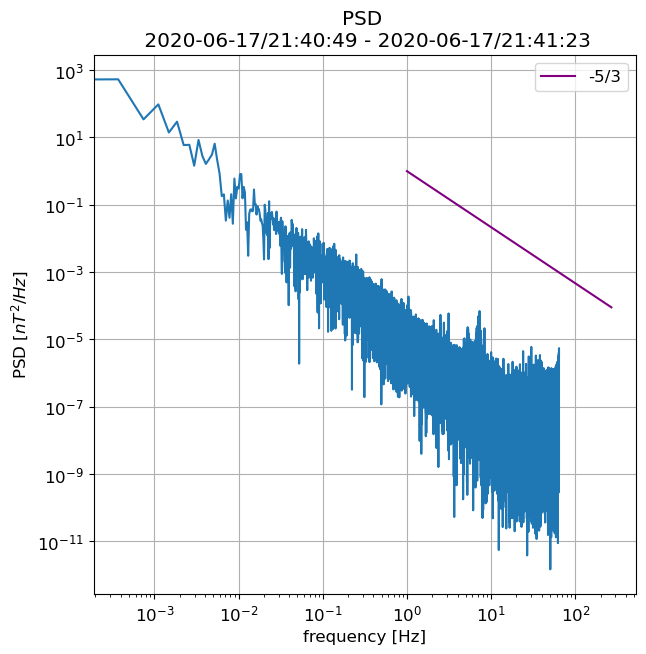

In [25]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


fs = 128 #Sampling frequency of the x time series
fig = plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 12})

ax = fig.add_subplot(111)
f, Pxx_den = signal.periodogram(np.array(mag_arr['Bmag'][st_t:end_t]), fs) # f = array of sample frequencies, Pxx PSD of x
ax.plot(f, Pxx_den)
#plt.ylim([1e-7, 1e2])
ax.set_title('PSD \n '+str(jet_candidate_timeranges[0,0])+' - '+str(jet_candidate_timeranges[0,1]))

ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [$nT^2/Hz$]')
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')



# string1 = np.array2string(np.array(mag_arr['date'][st_t]))
# string2 = np.array2string(np.array(mag_arr['date'][end_t]))

# #print(string)
# time_period_string1 = string1.replace(":", "_")
# time_period_string1 = time_period_string1.replace("/", "_")
# time_period_string1 = time_period_string1.replace("T", "_")
# time_period_string1 = time_period_string1.replace("'", "_")
# #print( time_period_string)
# # time string has .000 or .000000000 remove them for saving
# if len(time_period_string1) > 19:
#     time_period_string1 = time_period_string1[0:20]
#     #print(string)

# time_period_string2 = string2.replace(":", "_")
# time_period_string2 = time_period_string2.replace("/", "_")
# time_period_string2 = time_period_string2.replace("T", "_")
# time_period_string2 = time_period_string2.replace("'", "_")
# if len(time_period_string2) > 19:
#     time_period_string2 = time_period_string2[0:20]
#     #print(string)
# time_period_string = time_period_string1+time_period_string2



energy_containing_range = np.argwhere(f < 0.0001)
    
inertial_range = np.argwhere((0.0001 <= f) & (f <= 0.1))

dissipation_range = np.argwhere( (0.1 <= f) &(f <= 1))

electron_dissipation =  np.argwhere( f > 1)

ax.plot(inertial_range,(inertial_range**(-5/3)),color='purple',label='-5/3') 
ax.legend()











plt.show()

In [ ]:
#take delta B, 

In [15]:

#Constants
c = 2.99792458e8  #speed of light (m/s)
m_e = 9.10939e-31         #electron mass (kg)
ε0 = 8.8541878e-12  #epsilon (As/Vm)
e = 1.6022e-19         #charge (C=As)
my = 4.0*1e-7     #my0 (Vs/Am)
mp = 1.672623*1e-27    #proton rest mass  (kg)
kb = 1.38066*1e-23     #Boltzmann constant (J/K) (kg m^2 s^-2)(K^-1)
μ0 = 1.256637061*1e-6 # N A^-2 #kg m s^-2 A^-2

#permittivity of free space: ε0=8.85*1e-12 C^2 N^-1 m^-2

n_arr_str = ['MMS1_ni.csv','MMS2_ni.csv','MMS3_ni.csv','MMS4_ni.csv']
#n_arr_str = 'MMS2_ni.csv'

all_den = []
for t in range(len(n_arr_str)):
    
    n_arr = pd.read_csv(n_arr_str[t],header = 0,names = ['times','ni','date'],parse_dates=['date'])
    t1 = pd.to_datetime(times_temp[0,0])
    t2 = pd.to_datetime(times_temp[0,1])

    all_den.append(n_arr['ni'][n_arr.date.searchsorted(t1):n_arr.date.searchsorted(t2)])

    # f1=np.concatenate((a1, b1,c1,d1))
    # ave_n_CS =  np.mean(f1)
ave_den = np.mean(np.array(all_den))

ωpi= np.sqrt((ave_den*1e6*e**2)/(mp*ε0)) #ion plasma frequency units of s^-1

di = c/ωpi #ion inertial length: di = c/ωpi (aka ion skin depth) units in meters

# # get ion density for the duration of the current sheet:

print('average  density over all spacecraft',all_den1)

print('ion inertial length',di)

print('gyrofrequency',ωpi)


average  density over all spacecraft 2.4994083184375
ion inertial length 144031.92559779543
gyrofrequency 2081.4306047477344


In [13]:
import statistics
import numpy as np
import pandas as pd
n_arr_str = ['MMS1_ni.csv','MMS2_ni.csv','MMS3_ni.csv','MMS4_ni.csv']
#n_arr_str = 'MMS2_ni.csv'

# all_den =[]

# for t in range(len(n_arr_str)):
    
#     n_arr = pd.read_csv(n_arr_str[t],header = 0,names = ['times','ni','date'],parse_dates=['date'])
#     t1 = pd.to_datetime('2020-06-17/21:00:00')
#     t2 = pd.to_datetime('2020-06-18/01:00:00')

#     d = n_arr['ni'][n_arr.date.searchsorted(t1):n_arr.date.searchsorted(t2)].to_list()
#     #print(len(d))
#     all_den.append(d)

#     # f1=np.concatenate((a1, b1,c1,d1))
#     # ave_n_CS =  np.mean(f1)


t1 = pd.to_datetime('2020-06-17/21:00:00')
t2 = pd.to_datetime('2020-06-18/01:00:00')

n_arr1 = pd.read_csv(n_arr_str[0],header = 0,names = ['times','ni','date'],parse_dates=['date'])
a = n_arr1['ni'][n_arr1.date.searchsorted(t1):n_arr1.date.searchsorted(t2)].to_numpy()

n_arr2 = pd.read_csv(n_arr_str[1],header = 0,names = ['times','ni','date'],parse_dates=['date'])
b = n_arr2['ni'][n_arr2.date.searchsorted(t1):n_arr2.date.searchsorted(t2)].to_numpy()

n_arr3 = pd.read_csv(n_arr_str[2],header = 0,names = ['times','ni','date'],parse_dates=['date'])
c = n_arr3['ni'][n_arr3.date.searchsorted(t1):n_arr3.date.searchsorted(t2)].to_numpy()


n_arr4 = pd.read_csv(n_arr_str[3],header = 0,names = ['times','ni','date'],parse_dates=['date'])
d = n_arr4['ni'][n_arr4.date.searchsorted(t1):n_arr4.date.searchsorted(t2)].to_numpy()



print(np.shape(a))

print(np.shape(b))


print(np.shape(c))

print(np.shape(d))
# all_den = np.stack((a,b,c,d),axis =0)


all_den = np.hstack((a,b,c,d))

print(all_den)


print(np.mean(all_den))

# print(len(all_den))
# ave_den = statistics.mean(all_den)

# std_den = statistics.pstdev(all_den)

print('std:', np.std(all_den))
print('average  density over all spacecraft', np.mean(all_den))
# # # all_den

(95999,)
(95998,)
(95999,)
(96000,)
[1.5655308  1.5911553  1.6169773  ... 0.95530826 0.9250308  0.9518007 ]
2.1662948305385727
std: 1.705314686203377
average  density over all spacecraft 2.1662948305385727
